In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [147]:
df = pd.read_csv('klout_scores.csv',header=None,names=['score'])
df.head(1)

,score
0,25.104179


In [291]:
class OptionsHist():
    
    def __init__(self, dataframe, col_name, x_name, 
                 y_name):
        self.dataframe = dataframe
        self.col_name = col_name
        self.x_name = plt.xlabel(x_name,fontsize=14)
        self.y_name = plt.ylabel(y_name,fontsize=14)
        self.bins = ''
        self.mu_line = plt.axvline(np.mean(dataframe[col_name]),color='r',
                                  linestyle='--',lw=2,label='Mean')
        self.median_line = plt.axvline(np.median(dataframe[col_name]),color='y',
                                  linestyle='--',lw=2,label='Median')
        self.xticks = plt.xticks(fontsize=14)
        self.yticks = plt.yticks(fontsize=14)
        self.legend = plt.legend(fontsize=14) 
        


In [292]:
class Hist(OptionsHist):
    def __init__(self, dataframe, col_name, x_name, 
                 y_name):
        OptionsHist.__init__(self, dataframe, col_name, x_name, 
                 y_name)

        plt.hist(dataframe[col_name])

class HistBins(OptionsHist):
    def __init__(self, dataframe, col_name, x_name, 
                 y_name,start, stop,binsize):
        OptionsHist.__init__(self, dataframe, col_name, x_name, 
                 y_name)
        self.start = start
        self.stop = stop
        self.binsize = binsize
        self.bin_edges = np.arange(self.start, self.stop + self.binsize,self.binsize)    
        plt.hist(dataframe[col_name],bins=self.bin_edges)

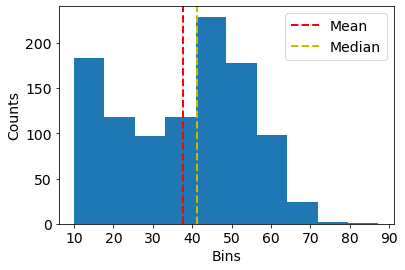

In [293]:
a = Hist(df,'score','Bins','Counts')

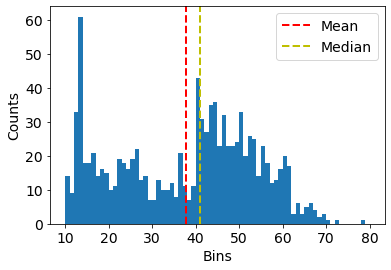

In [294]:
b = HistBins(df,'score','Bins','Counts', 10, 80, 1)

In [295]:
class HistLog10(OptionsHist):
    """Create a histogram with logarithmic scale (log10).
    Arguments:
        OptionsHist {[type]} -- [description]
    """
    def __init__(self, dataframe, col_name, x_name, y_name, start,
                x_axis_scale, binsize, thousands = bool):
        OptionsHist.__init__(self, dataframe, col_name, x_name, 
                 y_name)
        
        self.start = start
        self.x_axis_scale = [] # list of values provided by user for x axis
        self.binsize = binsize #  will set the interval of bins
        self.log_data = np.log10(dataframe[col_name]) # direct data transform
        self.log_bin_edges = np.arange(self.start, self.log_data.max() + self.binsize, self.binsize)
        
        self.mu_line = plt.axvline(np.mean(self.log_data),color='r',
                                  linestyle='--',lw=2,label='Mean')
        
        self.median_line = plt.axvline(np.median(self.log_data),color='y',
                                  linestyle='--',lw=2,label='Median')
        
        self.thousands = thousands
        self.convert_ticks = ''
        self.converted_labels = ''
        
        # FIRST plot histogram then plot xscale and xticks otherwise x-axis will be logarithmic
        plt.hist(self.log_data, bins = self.log_bin_edges)
        plt.xscale('log')
        plt.tick_params(axis='both', which='minor', labelsize=0);
        
        
        # ticks is base 10 used to set the axis. Show either base converted or non converted values
        self.xticks = plt.xticks(ticks = self.x_axis_scale, labels = self.converted_labels)

    def scale_convert(self,list_to_convert):
        """Convert list of values using NumPy log10(). 
        Arguments:
            list_to_convert {list} -- A list of values used for x or y axis for use
            when pandas data has been transformed. 
        Returns:
            [numpy list] -- A list of converted values using Numpy log10.
        """
        converted = np.array(list_to_convert)
        converted_ln = np.log10(converted)
        converted_ln = [round(i,2) for i in converted_ln]
        self.x_axis_scale = converted_ln

    def convert_thousands(self, list_to_convert):
        """Convert the x axis scale to thousands. Convert if bool thousands is True.

        Arguments:
            list_to_convert {list} -- The list of values to be converted to thousands
        Returns:
            [list] -- Will return a list that will be converted or not based self.thousands bool
        """
        if self.thousands == True:
            list_to_convert = np.array(list_to_convert)
            converted = list_to_convert / 1000
            converted_values = [int(i) for i in converted]
            self.convert_labels =  converted_values 



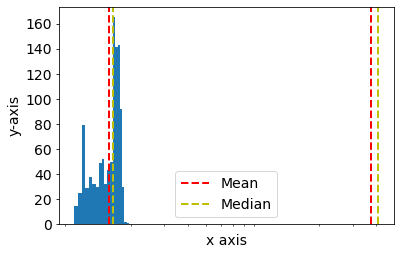

In [296]:
scale = np.arange(10, 80, 5, dtype='int_')
k = HistLog10(df,'score','x axis','y-axis',1,scale,0.05,True)

In [297]:
scale = np.arange(10, 80, 5, dtype='int_')
def scale_convert(scale_convert):
    '''Scale converter takes a list of integers and converts the values using Numpy
    log10(). '''
    np_list_int = np.array(list_int)
    log_values = np.log10(np_list_int)
    converted_values_log10 = [round(i,2) for i in log_values]
    return converted_values_log10
print(scale)

[10 15 20 25 30 35 40 45 50 55 60 65 70 75]


In [287]:
new = [np.log10(i) for i in scale]
print((max(new) - min(new)) / len(new))

0.06250437595655


In [187]:
dir(Hist)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'change_xtick']

In [ ]:
dir(OptionsHist)

In [ ]:
OptionsHist.__dict__

In [ ]:
o = object()
o